# **Applied Questions**

## Question 3

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
# Read the college.csv file into a DataFrame
college = pd.read_csv('college.csv')

In [17]:
# Changing the first column's name
college = college.rename(columns={'Unnamed: 0': 'College'})

college.head()

,College,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [18]:
college.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


array([[<Axes: xlabel='Apps', ylabel='Apps'>,
        <Axes: xlabel='Enroll', ylabel='Apps'>,
        <Axes: xlabel='Top10perc', ylabel='Apps'>],
       [<Axes: xlabel='Apps', ylabel='Enroll'>,
        <Axes: xlabel='Enroll', ylabel='Enroll'>,
        <Axes: xlabel='Top10perc', ylabel='Enroll'>],
       [<Axes: xlabel='Apps', ylabel='Top10perc'>,
        <Axes: xlabel='Enroll', ylabel='Top10perc'>,
        <Axes: xlabel='Top10perc', ylabel='Top10perc'>]], dtype=object)

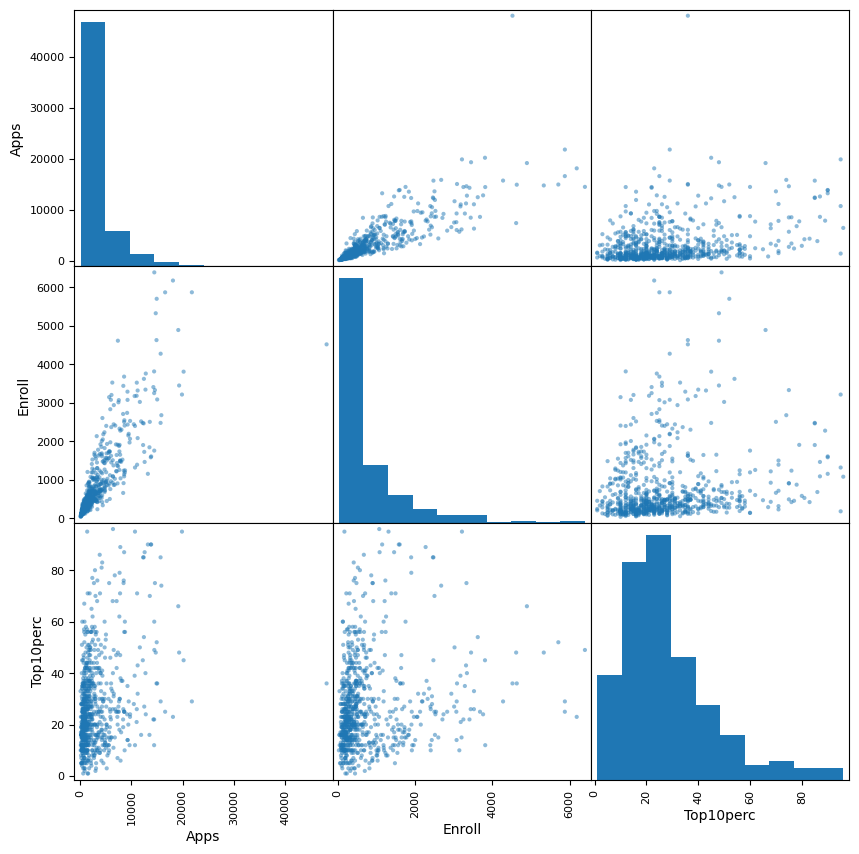

In [19]:
pd.plotting.scatter_matrix(college[['Apps', 'Enroll', 'Top10perc']], figsize=(10,10))

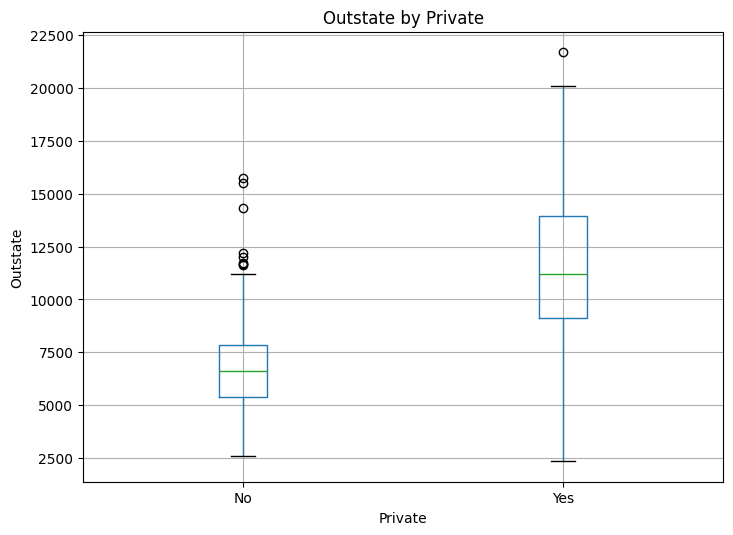

In [20]:
# Creating side-by-side boxplots
college.boxplot(column='Outstate', by='Private', figsize=(8, 6))

# Adding labels and title
plt.title('Outstate by Private')
plt.ylabel('Outstate')
plt.xlabel('Private')
plt.suptitle('')  # Removing the automatically generated title

plt.show()

Elite
Not Elite    699
Elite         78
Name: count, dtype: int64


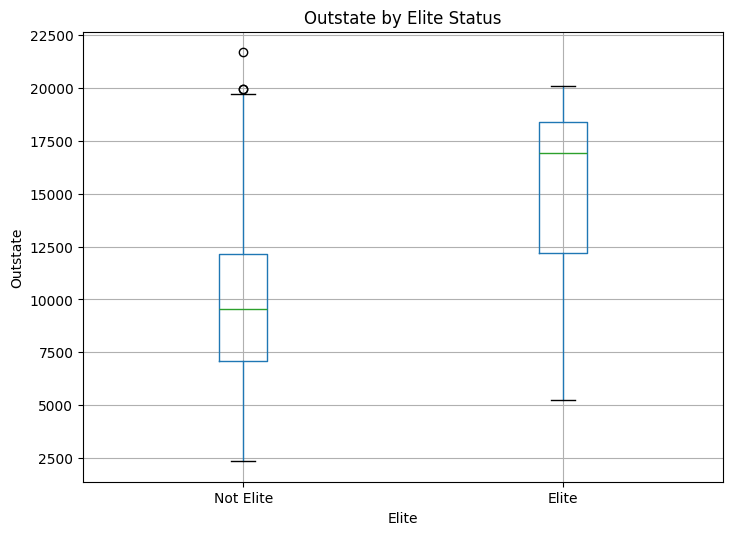

In [21]:
# Creating the new variable 'Elite'
college['Elite'] = pd.cut(college['Top10perc'], bins=[0, 50, 100], labels=['Not Elite', 'Elite'])

# Checking the counts of 'Elite' universities
elite_counts = college['Elite'].value_counts()
print(elite_counts)

# Creating side-by-side boxplots of 'Outstate' versus 'Elite'
college.boxplot(column='Outstate', by='Elite', figsize=(8, 6))

# Adding labels and title
plt.title('Outstate by Elite Status')
plt.ylabel('Outstate')
plt.xlabel('Elite')
plt.suptitle('')  # Removing the automatically generated title

plt.show()

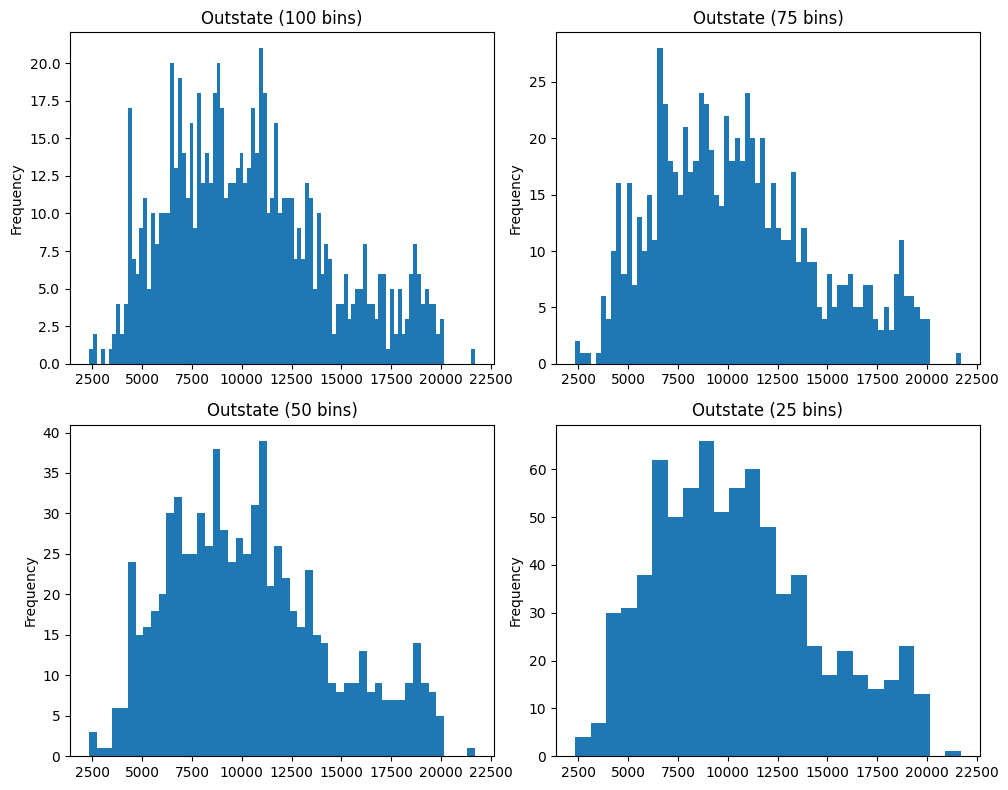

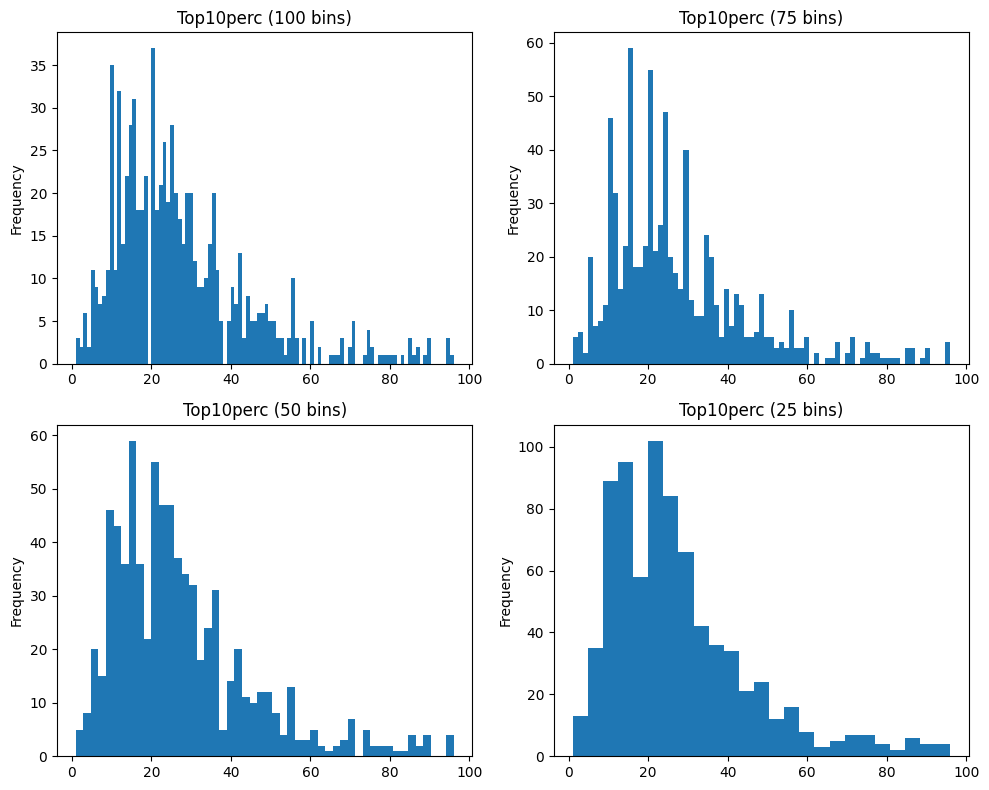

In [22]:
# Creating histograms with differing numbers of bins
plt.figure(figsize=(10, 8))

# Histogram for 'Outstate' with 10 bins
plt.subplot(2, 2, 1)
college['Outstate'].plot.hist(bins=100)
plt.title('Outstate (100 bins)')

# Histogram for 'Outstate' with 5 bins
plt.subplot(2, 2, 2)
college['Outstate'].plot.hist(bins=75)
plt.title('Outstate (75 bins)')

# Histogram for 'Outstate' with 50 bins
plt.subplot(2, 2, 3)
college['Outstate'].plot.hist(bins=50)
plt.title('Outstate (50 bins)')

# Histogram for 'Outstate' with 25 bins
plt.subplot(2, 2, 4)
college['Outstate'].plot.hist(bins=25)
plt.title('Outstate (25 bins)')

# Adjust layout
plt.tight_layout()

plt.show()

# Creating histograms with differing numbers of bins
plt.figure(figsize=(10, 8))

# Histogram for 'Top10perc' with 100 bins
plt.subplot(2, 2, 1)
college['Top10perc'].plot.hist(bins=100)
plt.title('Top10perc (100 bins)')

# Histogram for 'Enroll' with 5 bins
plt.subplot(2, 2, 2)
college['Top10perc'].plot.hist(bins=75)
plt.title('Top10perc (75 bins)')

# Histogram for 'Apps' with 50 bins
plt.subplot(2, 2, 3)
college['Top10perc'].plot.hist(bins=50)
plt.title('Top10perc (50 bins)')

# Histogram for 'Outstate' with 25 bins
plt.subplot(2, 2, 4)
college['Top10perc'].plot.hist(bins=25)
plt.title('Top10perc (25 bins)')

# Adjust layout
plt.tight_layout()

plt.show()

## Question 4

In [23]:
auto = pd.read_csv("auto.csv")

In [24]:
# Deleting rows that include '?' in the 'horsepower' column
for index, row in auto.iterrows():
    if row['horsepower'] == '?':
        print(index)

auto = auto.drop(auto.index[[32, 126, 330, 336, 354]])
auto['horsepower'] = pd.to_numeric(auto['horsepower'])

auto.head()

32
126
330
336
354


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


Quantitative Predictors:
mpg (miles per gallon),
cylinders,
displacement,
horsepower,
weight,
acceleration

Qualitative Predictor:
model year,
origin

The 'car name' column can also be considered qualitative as it contains the names of the cars, 
but it's not a predictor variable since it uniquely identifies each car and doesn't provide predictive information. 
Therefore, it's typically excluded from analysis.

So, in summary:
Quantitative predictors: mpg, cylinders, displacement, horsepower, weight, acceleration
Qualitative predictors: model year, origin

In [25]:
# Defining the list of quantitative predictors
quantitative_predictors = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration']

# Finding the range, mean, and standard deviation for each quantitative predictor
statistics = {}
for predictor in quantitative_predictors:
    min_value = np.min(auto[predictor])
    max_value = np.max(auto[predictor])
    mean_value = auto[predictor].mean()
    std_value = auto[predictor].std()
    statistics[predictor] = {'range': (min_value, max_value), 'mean': mean_value, 'std': std_value}

# Printing the range, mean, and standard deviation for each quantitative predictor
for predictor, values in statistics.items():
    print(f"Predictor: {predictor}")
    print(f"Range: {values['range'][0]} to {values['range'][1]}")
    print(f"Mean: {values['mean']:.2f}")
    print(f"Standard Deviation: {values['std']:.2f}\n")


Predictor: mpg
Range: 9.0 to 46.6
Mean: 23.45
Standard Deviation: 7.81

Predictor: cylinders
Range: 3 to 8
Mean: 5.47
Standard Deviation: 1.71

Predictor: displacement
Range: 68.0 to 455.0
Mean: 194.41
Standard Deviation: 104.64

Predictor: horsepower
Range: 46 to 230
Mean: 104.47
Standard Deviation: 38.49

Predictor: weight
Range: 1613 to 5140
Mean: 2977.58
Standard Deviation: 849.40

Predictor: acceleration
Range: 8.0 to 24.8
Mean: 15.54
Standard Deviation: 2.76



In [26]:
# Removing the 10th through 85th observations
auto_subset = auto.drop(auto.index[9:84])

# Selecting quantitative predictors
quantitative_predictors = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration']

# Calculating range, mean, and standard deviation for each predictor in the subset
subset_statistics = {}
for predictor in quantitative_predictors:
    min_value = auto_subset[predictor].min()
    max_value = auto_subset[predictor].max()
    mean_value = auto_subset[predictor].mean()
    std_value = auto_subset[predictor].std()
    subset_statistics[predictor] = {'range': (min_value, max_value), 'mean': mean_value, 'std': std_value}

# Printing the range, mean, and standard deviation for each predictor in the subset
for predictor, values in subset_statistics.items():
    print(f"Predictor: {predictor}")
    print(f"Range: {values['range'][0]} to {values['range'][1]}")
    print(f"Mean: {values['mean']:.2f}")
    print(f"Standard Deviation: {values['std']:.2f}\n")


Predictor: mpg
Range: 11.0 to 46.6
Mean: 24.37
Standard Deviation: 7.88

Predictor: cylinders
Range: 3 to 8
Mean: 5.38
Standard Deviation: 1.66

Predictor: displacement
Range: 68.0 to 455.0
Mean: 187.75
Standard Deviation: 99.94

Predictor: horsepower
Range: 46 to 230
Mean: 100.96
Standard Deviation: 35.90

Predictor: weight
Range: 1649 to 4997
Mean: 2939.64
Standard Deviation: 812.65

Predictor: acceleration
Range: 8.5 to 24.8
Mean: 15.72
Standard Deviation: 2.69



<Figure size 1200x1000 with 0 Axes>

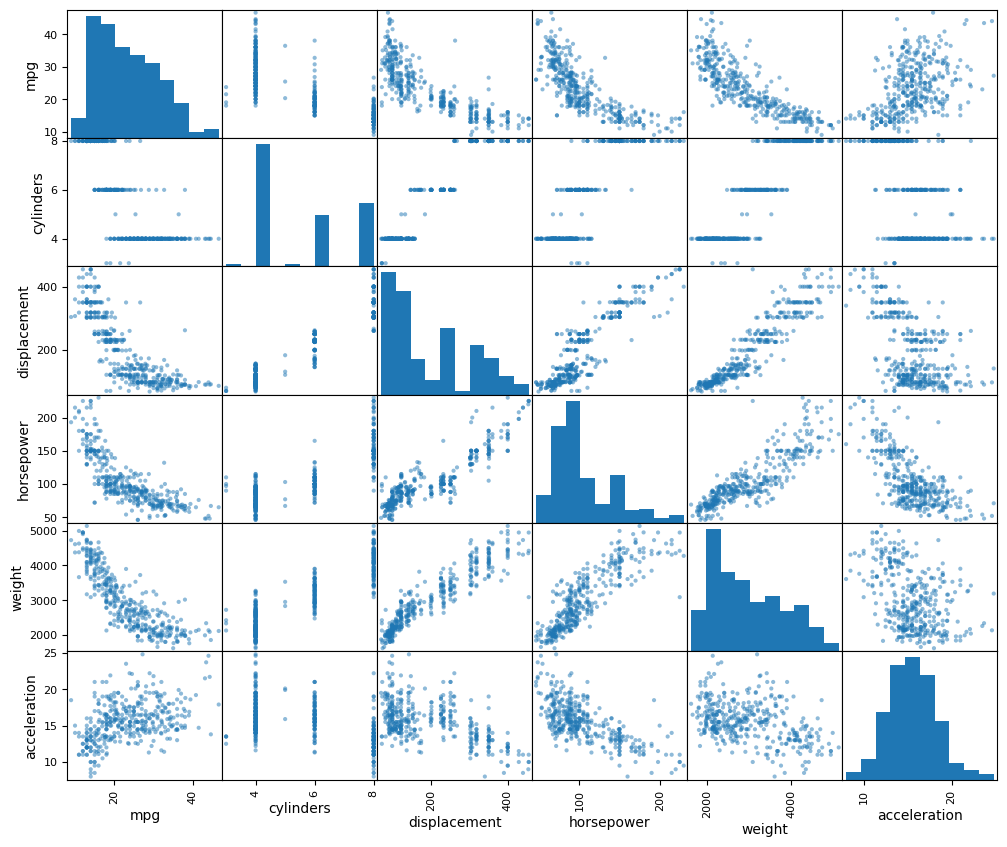

<Axes: title={'center': 'mpg'}, xlabel='year'>

<Figure size 1200x800 with 0 Axes>

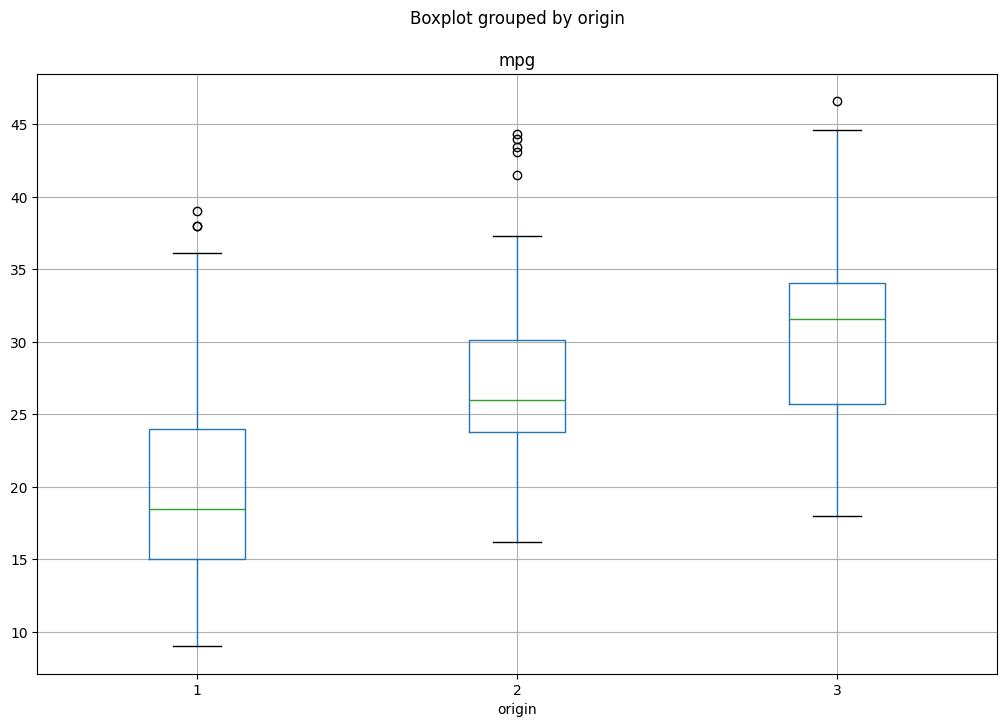

<Figure size 1200x800 with 0 Axes>

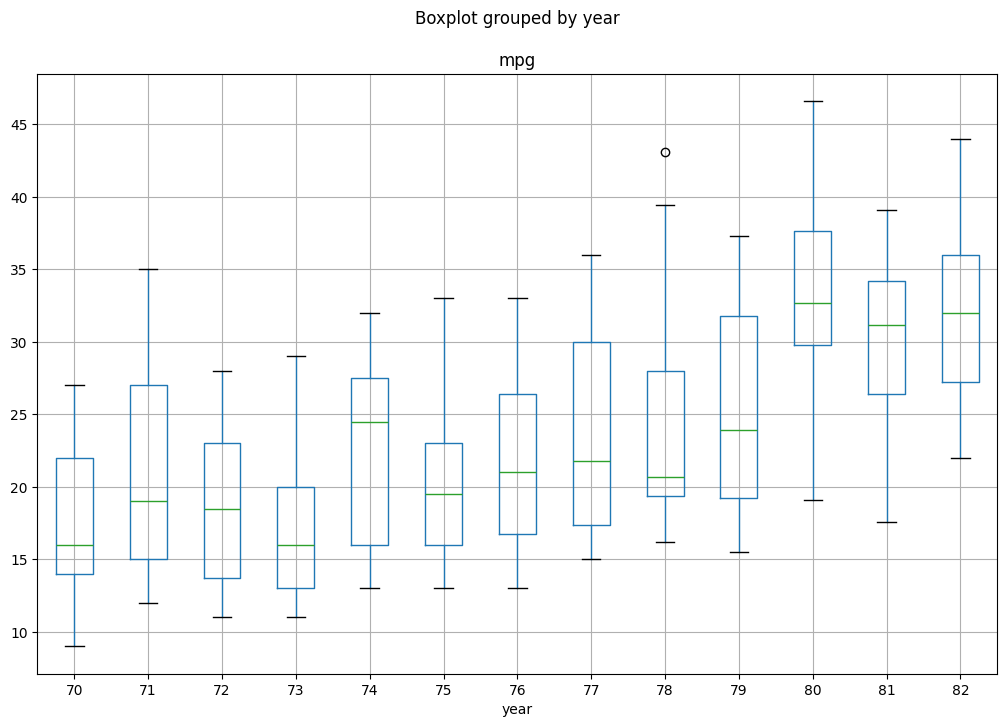

In [27]:
# Scatterplot matrix for quantitative predictors
plt.figure(figsize=(12, 10))
pd.plotting.scatter_matrix(auto[quantitative_predictors], figsize=(12, 10))
plt.show()

# Boxplot for qualitative predictor 'origin' vs. quantitative predictor 'mpg'
plt.figure(figsize=(12, 8))
auto.boxplot(column='mpg', by='origin', figsize=(12, 8))


# Boxplot for qualitative predictor 'model year' vs. quantitative predictor 'mpg'
plt.figure(figsize=(12, 8))
auto.boxplot(column='mpg', by='year', figsize=(12, 8))


### Comments on Relationships between Variables

1. **MPG vs. Cylinders:** Typically, we might expect to see a negative correlation here, as cars with more cylinders often consume more fuel.
2. **MPG vs. Displacement:** Similar to cylinders, larger displacement usually indicates a more powerful engine that consumes more fuel, leading to a negative correlation with MPG.
3. **MPG vs. Horsepower:** More horsepower can mean lower MPG due to higher fuel consumption for increased power output.
4. **MPG vs. Weight:** Heavier cars generally have lower MPG, indicating a negative correlation as the engine needs to work harder to move more weight.
5. **MPG vs. Acceleration:** This relationship can be complex; sometimes, cars with quick acceleration are sporty and less fuel-efficient, but modern engines can be both fast and efficient.
6. **Cylinders vs. Displacement:** There’s likely a positive correlation, as more cylinders typically mean a larger engine displacement.
7. **Cylinders vs. Horsepower:** More cylinders often equate to more power, suggesting a positive correlation.
8. **Cylinders vs. Weight:** Heavier vehicles tend to have more cylinders, indicating a positive correlation.
9. **Cylinders vs. Acceleration:** The relationship here is not straightforward, as it depends on the engine type and vehicle design.
10. **Displacement vs. Horsepower:** A clear positive correlation is expected since larger engines typically produce more power.
11. **Displacement vs. Weight:** Larger engines are heavier, so we would anticipate a positive correlation.
12. **Displacement vs. Acceleration:** Larger displacement engines can provide quicker acceleration, but this is not always the case as it depends on the overall vehicle design.
13. **Horsepower vs. Weight:** More powerful engines can increase a vehicle’s weight, potentially showing a positive correlation.
14. **Horsepower vs. Acceleration:** Generally, a strong positive correlation is expected; more horsepower can lead to faster acceleration. But since horsepower and weight are positively correleted, we see negative correlation at here.
15. **Weight vs. Acceleration:** Typically, a negative correlation is seen here; heavier cars usually accelerate more slowly.


### Variables Potentially Useful for Predicting MPG

1. **Weight:** There’s an apparent negative correlation between mpg and weight. Heavier cars typically require more energy to move, thus reducing fuel efficiency. Weight could be a strong predictor of mpg.
2. **Displacement:** A larger engine displacement usually means a more powerful engine that consumes more fuel, leading to a negative correlation with mpg. Displacement could help predict mpg, especially when combined with other variables like weight and horsepower.
3. **Horsepower:** More horsepower often correlates with lower mpg because powerful engines tend to consume more fuel. However, this relationship might not be linear and could depend on the type of engine and vehicle efficiency technologies.
4. **Cylinders:** The number of cylinders in an engine can affect mpg since engines with more cylinders may consume more fuel. However, modern engines have become more efficient, so the impact of cylinders on mpg might be less pronounced than in the past.

These variables, especially when used together, could create a predictive model for mpg. It’s important to note that the strength and nature of these relationships can vary based on the type of car, engine technology, and other factors. Statistical analysis methods like regression could be employed to quantify these relationships and make predictions about mpg.


# Data Analysis
## Question 4

In [28]:
# Load the Gapminder dataset
#%pip install gapminder
from gapminder import gapminder

# Display the first few rows of the dataset
display(gapminder.head())

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


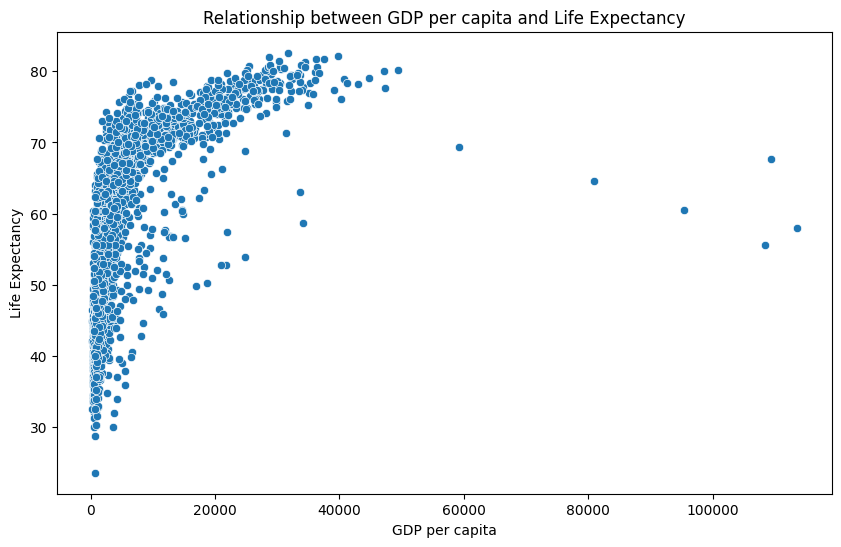

Correlation between life expectancy and GDP per capita: 0.58


In [29]:
# Create a scatter plot of GDP per capita vs. life expectancy
plt.figure(figsize=(10, 6))
sns.scatterplot(x='gdpPercap', y='lifeExp', data=gapminder)
plt.title('Relationship between GDP per capita and Life Expectancy')
plt.xlabel('GDP per capita')
plt.ylabel('Life Expectancy')
plt.show()

# Calculate the correlation between life expectancy and GDP per capita
correlation = gapminder['lifeExp'].corr(gapminder['gdpPercap'])
print(f"Correlation between life expectancy and GDP per capita: {correlation:.2f}")


The correlation between life expectancy and GDP per capita comes up as 0.58. This value of correlation suggests that as GDP per capita increases, life expectancy tends to increase as well, although the strength of this relationship is not extremely strong.

## Question 5 Titanic
Note: We couldn't download the titanic dataset by using 'sns.load_dataset(’titanic’)'. Instead, we downloaded the same data and saved it as 'titanic.csv'.

In [30]:
# Read the Titanic dataset into a DataFrame
titanic = pd.read_csv('titanic.csv')

# Display the first few rows of the dataset
display(titanic.head())

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


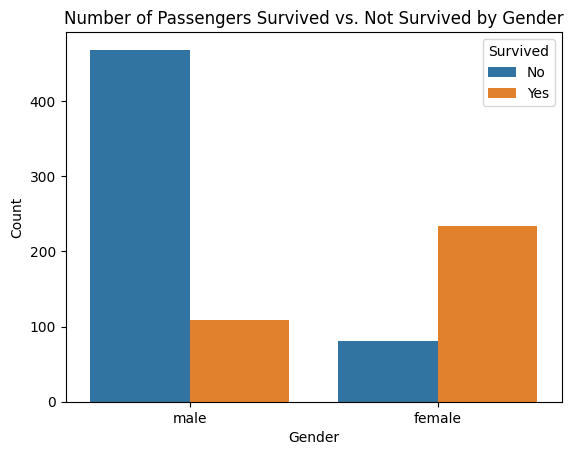

In [31]:
# Create a barplot
sns.countplot(x='sex', hue='survived', data=titanic)

# Add labels and title
plt.title('Number of Passengers Survived vs. Not Survived by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])

# Show the plot
plt.show()

## Question 6

In [32]:
covid = pd.read_csv('WHO-COVID-19-global-data.csv')

display(covid.head())

# Filter data for Germany
germany_data = covid[covid['Country'] == 'Germany']

display(germany_data.head())

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-05,AF,Afghanistan,EMRO,NaN,0,NaN,0
1,2020-01-12,AF,Afghanistan,EMRO,NaN,0,NaN,0
2,2020-01-19,AF,Afghanistan,EMRO,NaN,0,NaN,0
3,2020-01-26,AF,Afghanistan,EMRO,NaN,0,NaN,0
4,2020-02-02,AF,Afghanistan,EMRO,NaN,0,NaN,0


,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
17876,2020-01-05,DE,Germany,EURO,1.0,1,3.0,3
17877,2020-01-12,DE,Germany,EURO,NaN,1,NaN,3
17878,2020-01-19,DE,Germany,EURO,NaN,1,NaN,3
17879,2020-01-26,DE,Germany,EURO,1.0,2,3.0,6
17880,2020-02-02,DE,Germany,EURO,9.0,11,3.0,9


In [33]:
# Convert NaN at New_deaths to 0
germany_data['New_deaths'] = germany_data['New_deaths'].fillna(0)

# Print cumulative cases in Germany day by day
germany_data['New_deaths'] = germany_data['New_deaths'].astype(int)
germany_data['New_deaths']

/var/folders/0p/f7tm916900ld7h415zrtvygh0000gn/T/ipykernel_14939/3414141283.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  germany_data['New_deaths'] = germany_data['New_deaths'].fillna(0)
/var/folders/0p/f7tm916900ld7h415zrtvygh0000gn/T/ipykernel_14939/3414141283.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  germany_data['New_deaths'] = germany_data['New_deaths'].astype(int)


17876    3
17877    0
17878    0
17879    3
17880    3
        ..
18089    0
18090    0
18091    0
18092    0
18093    0
Name: New_deaths, Length: 218, dtype: int64

/var/folders/0p/f7tm916900ld7h415zrtvygh0000gn/T/ipykernel_14939/3935019507.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  germany_data['MA'] = germany_data['New_deaths'].rolling(window=7).mean()


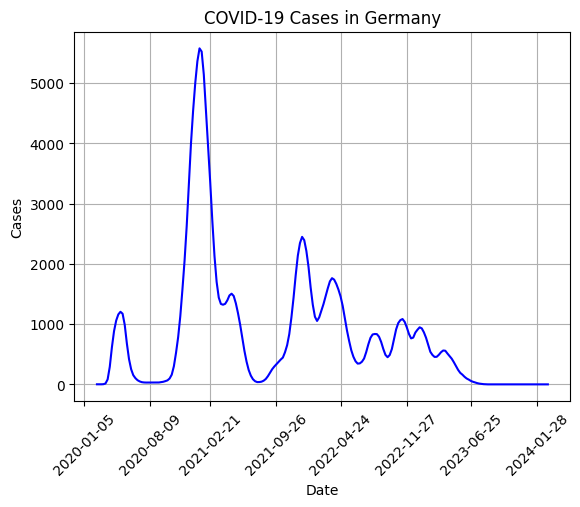

In [34]:
import matplotlib.dates as mdates

# Calculate 7-day moving average
germany_data['MA'] = germany_data['New_deaths'].rolling(window=7).mean()

#Plot cumulative cases
plt.plot(germany_data['Date_reported'],germany_data['MA'], label='Cumulative Cases', color="blue")

# Show dates on x-axis in a readable format
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())

# Add labels and title
plt.title('COVID-19 Cases in Germany')
plt.xlabel('Date')
plt.ylabel('Cases')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

